In [1]:
import pandas as pd

In [2]:
family_file = pd.read_csv("..//data//2016//family_file.csv")
househld_file = pd.read_csv("..//data//2016//househld_file.csv")
person_file = pd.read_csv("..//data//2016//person_file.csv")
injury_epsd = pd.read_csv("..//data//2016//injury_epsd.csv")
adult_file = pd.read_csv("..//data//2016//adult_file.csv")
child_file = pd.read_csv("..//data//2016//child_file.csv")

In [3]:
import numpy as np

In [4]:
adult_file['FLUVACYR']=np.where(adult_file['FLUVACYR']==1,1,0)

adult_file=adult_file[adult_file['DIBEV1']==1]

adult_file.index = range(0,len(adult_file.index))

adult_file=adult_file.fillna(99999)

In [35]:
adult_file.corr().to_csv("..//output//varriable_corr.csv")

In [9]:
from sklearn import cross_validation

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
adult_file=adult_file.drop(['FLUVACTP','FLUVAC_M','FLUVAC_Y'],axis=1)

In [11]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

data_x =  adult_file.drop(['FLUVACYR'],axis=1)
data_y = adult_file['FLUVACYR']
print(data_x.shape)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_x, data_y)
model = SelectFromModel(lsvc, prefit=True)
data_x_new = model.transform(data_x)
print(data_x_new.shape)

(3519, 801)
(3519, 54)


In [12]:
selected_feature = pd.DataFrame(data_x.columns)

selected_feature.columns=['columns']

selected_feature['selection']=model.get_support()

selected_col_list = selected_feature[selected_feature['selection']==True]['columns'].tolist()

In [13]:
data_x = adult_file.drop(['FLUVACYR'],axis=1)# adult_file[selected_col_list]
data_y = adult_file['FLUVACYR']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.05, random_state=42)

from sklearn import metrics
#from sklearn import tree
#clf = tree.DecisionTreeClassifier()

#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import SVC
#clf = OneVsRestClassifier(SVC(kernel="linear"))
#from sklearn.ensemble import RandomForestClassifier
#clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=10))
#from sklearn.naive_bayes import MultinomialNB
#clf = OneVsRestClassifier(MultinomialNB(alpha=0.01))
#from sklearn import svm
#clf = svm.SVC(kernel="linear")


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#from sklearn import linear_model
#clf = linear_model.LogisticRegression(C=1e5)

clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

print("Overall Accuracy = %s" %metrics.accuracy_score(y_pred,y_test))
print("Classification Matrix")
print(metrics.classification_report(y_pred,y_test))

Overall Accuracy = 0.744318181818
Classification Matrix
             precision    recall  f1-score   support

          0       0.42      0.67      0.52        36
          1       0.90      0.76      0.83       140

avg / total       0.80      0.74      0.76       176



In [14]:
len(clf.feature_importances_)
feature_imp = pd.DataFrame(list(data_x.columns))
feature_imp.columns=['col_name']
feature_imp['imp_val']=clf.feature_importances_
feature_imp.sort_values(by=['imp_val'],ascending=False)

,col_name,imp_val
574,SHTPNUYR,0.039096
12,AGE_P,0.012870
42,DIFAGE2,0.009958
2,HHX,0.009893
5,WTFA_SA,0.009169
4,WTIA_SA,0.009004
508,BMI,0.008979
586,SHINGLES,0.008929
507,AWEIGHTP,0.008373
17,PSTRAT,0.008347


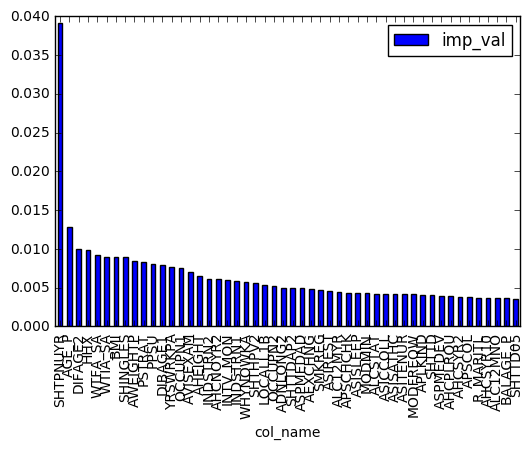

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_imp.sort_values(by=['imp_val'],ascending=False)[0:50].plot.bar(x=0,y='imp_val')

In [16]:
new_data = adult_file[feature_imp.sort_values(by=['imp_val'],ascending=False)[0:50]['col_name'].tolist()].copy()

In [25]:
top_50 = feature_imp.sort_values(by=['imp_val'],ascending=False)[0:50]['col_name'].tolist()

In [27]:
left_50=[x for x in list(adult_file.columns) if x not in top_50]

In [28]:
new_data=adult_file[left_50]

In [20]:
new_data.to_csv("..//output//Diabetic_NHIS.csv",index=False)

In [29]:
new_data['FLUVACYR']=adult_file['FLUVACYR'].copy()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
data_x =  new_data.drop(['FLUVACYR'],axis=1)
data_y = new_data['FLUVACYR']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.8, random_state=42)

#from sklearn import svm
from sklearn import metrics
#clf = svm.SVC(kernel="linear")

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

print("Overall Accuracy = %s" %metrics.accuracy_score(y_pred,y_test))
print("Classification Matrix")
print(metrics.classification_report(y_pred,y_test))

Overall Accuracy = 0.654829545455
Classification Matrix
             precision    recall  f1-score   support

          0       0.20      0.62      0.30       338
          1       0.93      0.66      0.77      2478

avg / total       0.84      0.65      0.71      2816



In [31]:
len(clf.feature_importances_)
feature_imp = pd.DataFrame(list(data_x.columns))
feature_imp.columns=['col_name']
feature_imp['imp_val']=clf.feature_importances_
feature_imp.sort_values(by=['imp_val'],ascending=False)

,col_name,imp_val
581,ASICCMP,0.011721
583,ASISLPST,0.009153
421,BEDDAYR,0.007879
22,WRKLONGH,0.007542
576,ASIMEDC,0.007028
570,ASINCNTO,0.006486
495,AHCAFYR3,0.006255
575,ASIRETR,0.005975
156,VIMREAD,0.005930
578,ASICNHC,0.005807


In [19]:
svm_weights_selected = (clf.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

imp= pd.DataFrame(list(data_x.columns))

imp['imp']=svm_weights_selected

imp.sort_values(by=['imp'],ascending=False)

,0,imp
32,ASISLEEP,1.000000e+00
1,AGE_P,4.457964e-01
2,DIFAGE2,2.593781e-01
0,SHTPNUYR,2.371504e-01
14,AVISEXAM,1.963591e-01
19,INDSTRN1,1.936622e-01
23,OCCUPN2,1.822007e-01
15,AHEIGHT,1.626117e-01
24,ADNLONG2,1.440039e-01
11,DIBAGE1,1.177992e-01
